In [65]:
# import CSV for original data

body = client_434d7ee727fb442ab1842c6f7796dd2e.get_object(Bucket='asperaanalytics-donotdelete-pr-zm0d7wnxvkwdsw',Key='graph-data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

graph_df = pd.read_csv(body)
graph_df.head()

where_are_NaNs = np.isnan(graph_df)
graph_df[where_are_NaNs] = 0
print(graph_df)

      num_critic_for_reviews  duration  director_facebook_likes  \
0                      723.0     178.0                      0.0   
1                      302.0     169.0                    563.0   
2                      602.0     148.0                      0.0   
3                      813.0     164.0                  22000.0   
4                        0.0       0.0                    131.0   
5                      462.0     132.0                    475.0   
6                      392.0     156.0                      0.0   
7                      324.0     100.0                     15.0   
8                      635.0     141.0                      0.0   
9                      375.0     153.0                    282.0   
10                     673.0     183.0                      0.0   
11                     434.0     169.0                      0.0   
12                     403.0     106.0                    395.0   
13                     313.0     151.0                    563.

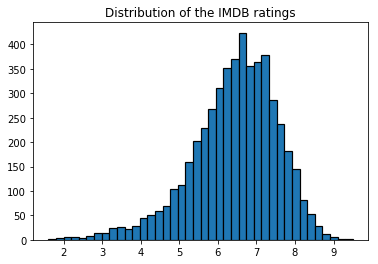

In [66]:
# create histogram for IMDB score distribution

import matplotlib as mpl
import matplotlib.pyplot as plt

font = {'fontname':'Arial', 'size':'14'}
title_font = { 'weight' : 'bold','size':'16'}
plt.hist(graph_df['imdb_score'], bins=40, edgecolor='black', linewidth=1.2)
plt.title("Distribution of the IMDB ratings")
plt.show()

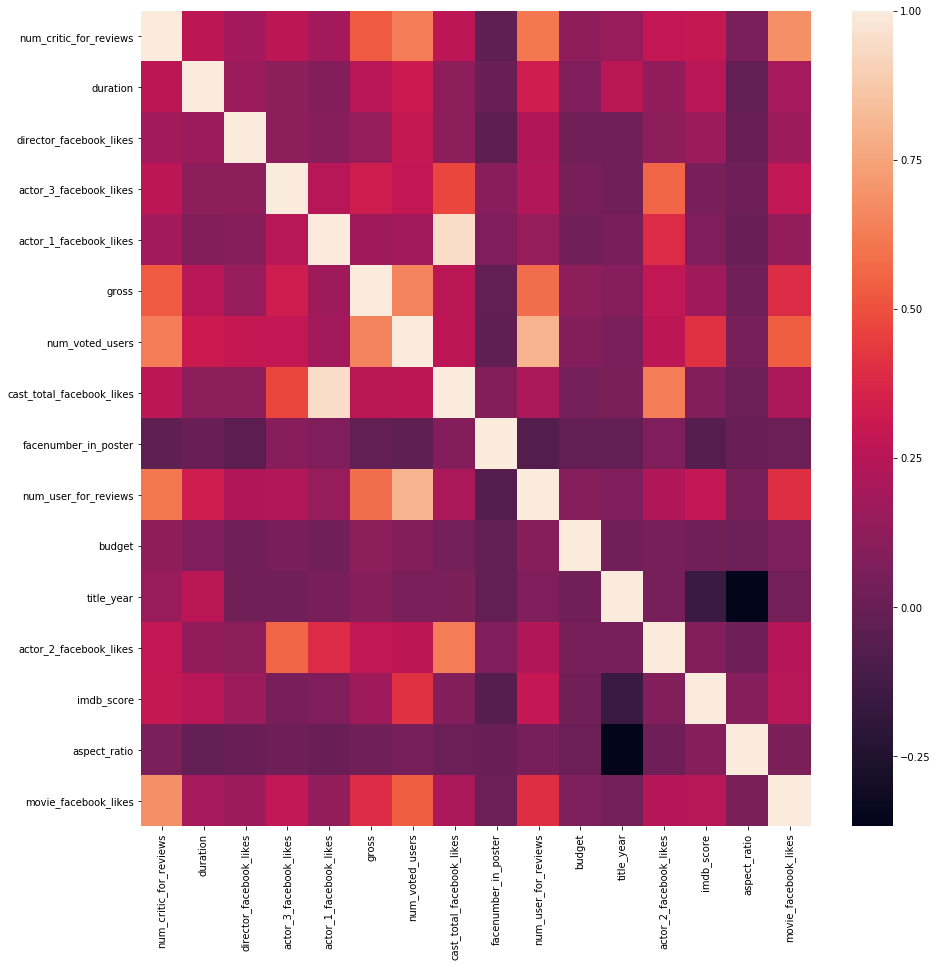

In [67]:
# create heatmap correlation matrix for features

f = plt.figure(figsize=(15, 15))
import seaborn as sns
corr = graph_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
# import cleansed CSV data

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import numpy as np

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_434d7ee727fb442ab1842c6f7796dd2e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='u526KJK9s_aMzeXL4LCSzHGzPU3vzh84Q-io4PptEUwG',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_434d7ee727fb442ab1842c6f7796dd2e.get_object(Bucket='asperaanalytics-donotdelete-pr-zm0d7wnxvkwdsw',Key='filtered_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body, encoding='latin-1')

In [ ]:
# replace NaN values with zeros
where_are_NaNs = np.isnan(df)
df[where_are_NaNs] = 0
# remove extra column
df = df.drop(df.columns[0], axis=1)
print(df)

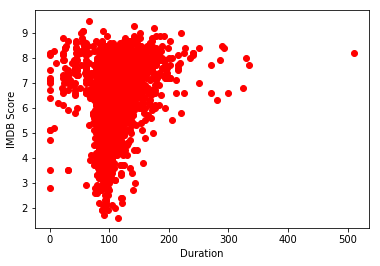

In [46]:
# making a basic plot

import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df['duration'], df['imdb_score'], color='red')
plt.xlabel('Duration')
plt.ylabel('IMDB Score')
plt.show()

In [47]:
# split data into training and testing data

from sklearn import linear_model
from sklearn.model_selection import train_test_split

X = df[['director_facebook_likes', 'cast_total_facebook_likes', 'num_critic_for_reviews', 'duration', 'num_voted_users', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'movie_facebook_likes', 'title_year', 'budget']]
Y = df[['imdb_score']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [7]:
# normalize data 0-1

from sklearn import preprocessing

mm_scaler = preprocessing.MinMaxScaler()

X_train_minmax = mm_scaler.fit_transform(X_train)
X_test_minmax = mm_scaler.transform(X_test)
print(X_train_minmax)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[[2.27272727e-04 9.61121931e-03 9.22509225e-02 ... 1.28653295e-03
  9.92559524e-01 9.00495272e-04]
 [0.00000000e+00 5.63466097e-02 1.50061501e-01 ... 1.46131805e-01
  9.90079365e-01 6.13974049e-03]
 [5.90909091e-04 1.20554063e-02 1.00861009e-01 ... 2.62464183e-03
  9.96527778e-01 3.68384430e-03]
 ...
 [1.11818182e-02 1.04075171e-01 7.79827798e-01 ... 1.89111748e-01
  9.98015873e-01 2.45589620e-03]
 [0.00000000e+00 5.54062668e-02 5.89175892e-01 ... 1.83381089e-01
  9.97023810e-01 1.22794810e-03]
 [2.27272727e-04 1.85603246e-03 2.09102091e-02 ... 2.02865330e-03
  9.99007937e-01 0.00000000e+00]]


In [48]:
# create a linear regression model

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_minmax, Y_train)
Y_predict = reg.predict(X_test_minmax)

In [54]:
# calculate error of model

from sklearn.metrics import mean_squared_error, mean_absolute_error

print('mean squared error: \n', mean_squared_error(Y_test, Y_predict))
print('mean absolute error: \n', mean_absolute_error(Y_test, Y_predict))

mean squared error: 
 0.9409291287120866
mean absolute error: 
 0.743005696740537


In [53]:
# create a random forest regression model

from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(random_state=0, n_estimators=200)
regr.fit(X_train_minmax, Y_train)
Y_predict_2 = regr.predict(X_test_minmax)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [68]:
# calculate error of model

print('mean squared error: \n', mean_squared_error(Y_test, Y_predict_2))
print('mean absolute error: \n', mean_absolute_error(Y_test, Y_predict_2))

# This model was our most accurate

mean squared error: 
 0.6622576813676905
mean absolute error: 
 0.6006868186323091


In [58]:
# create an SVR model

from sklearn.svm import SVR

clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(X_train_minmax, Y_train) 
Y_predict_3 = clf.predict(X_test_minmax)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
# calculate error of model

print('mean squared error: \n', mean_squared_error(Y_test, Y_predict_3))
print('mean absolute error: \n', mean_absolute_error(Y_test, Y_predict_3))

mean squared error: 
 0.8762766458380303
mean absolute error: 
 0.6991054165392233
